In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import pickle

# Load API Key and download directory from config file
CONFIG_FILE = "../config/api-call.json"

def load_config(config_path):
    """Load configuration from a JSON file."""
    with open(config_path, "r") as file:
        return json.load(file)

# Load config values
config = load_config(CONFIG_FILE)

# print(config)
DOWNLOAD_DIR = config["ned"]["ned_download_dir"]
print("DOWNLOAD_DIR :", DOWNLOAD_DIR)
csv_file_path = f'{DOWNLOAD_DIR}/power-gen-consolidated-data-2022-2024.csv'

# with open('../data/dc-ned-json-data-1.pkl', 'rb') as pickle_file:
with open(csv_file_path, 'rb') as csv_file:
    dc_ned_json_data_1 = pd.read_csv(csv_file)

# df_ned_json_data = dc_ned_json_data_1['df_orig']
df = pd.DataFrame(dc_ned_json_data_1)  # Convert dictionary to DataFrame

df.index.name = 'validto'

# Zorg ervoor dat de datumkolom wordt herkend als datetime
df['validto'] = pd.to_datetime(df['validto'])

df.head(3)



DOWNLOAD_DIR : ../data/powergen/


,validto,capacity_0,volume_0,capacity_1,production_wind,capacity_2,production_solar,capacity_4,production_heatpump,capacity_8,...,capacity_27,production_electricitymix,capacity_28,volume_28,capacity_35,production_CHP_total,capacity_50,production_solarthermal,capacity_51,production_allconsuminggas
validto,,,,,,,,,,,,,,,,,,,,,
0,2022-01-01 00:00:00+00:00,8098513,8098513,2031015,2031015,0,0,161795,161795,699000,...,10246506,10246506,NaN,NaN,1127491,1127491,482,482,1865500,1865500
1,2022-01-01 01:00:00+00:00,7914843,7914843,1864849,1864849,0,0,198870,198870,699000,...,10083044,10083044,NaN,NaN,1184195,1184195,391,391,1839500,1839500
2,2022-01-01 02:00:00+00:00,7442013,7442013,1784513,1784513,0,0,222172,222172,698995,...,9595627,9595627,NaN,NaN,1181864,1181864,444,444,1429250,1429250


/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_47436/3079273525.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=df["month"].unique(), patch_artist=True)


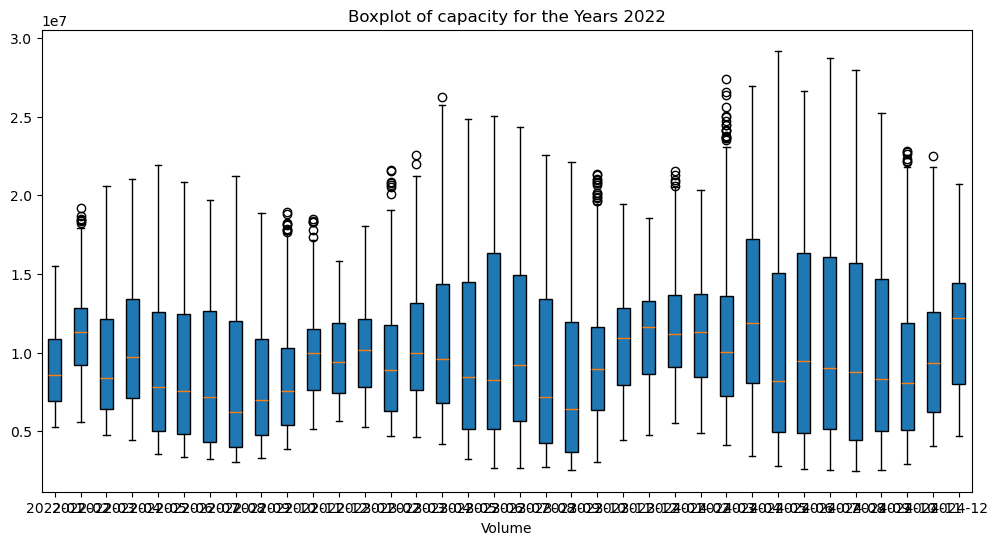

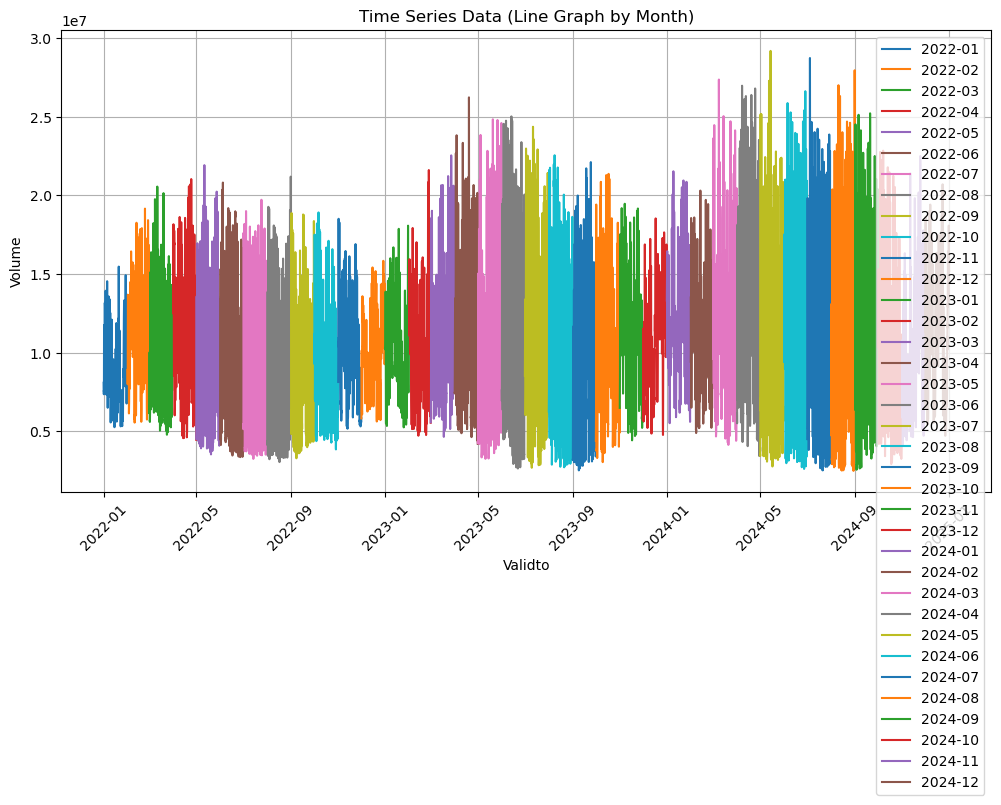

In [10]:
# Ensure the date column is recognized as datetime
df.index = pd.to_datetime(df.index)
# Ensure the index is recognized as datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the years 2022 and 2023
# df_filtered = df.loc['2022-01-01':'2023-12-31']

df_filtered = df

# Extract month and year for grouping
df_filtered["month"] = df_filtered["validto"].dt.strftime("%Y-%m")  # Format: YYYY-MM

# Group data by month
grouped_data = [df_filtered[df_filtered["month"] == month]["volume_0"] for month in df_filtered["month"].unique()]

# Create a boxplot of the Capacity column for the years 2022
plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data, labels=df["month"].unique(), patch_artist=True)
plt.xlabel('Volume')
plt.title('Boxplot of capacity for the Years 2022')
plt.show()


# Plot line graph for each month

# Group data by month
grouped_data_linegraph = {month: df_filtered[df_filtered["month"] == month] for month in df_filtered["month"].unique()}

plt.figure(figsize=(12, 6))
for month, data in grouped_data_linegraph.items():
    plt.plot(data["validto"], data["volume_0"], label=month)  # Line plot for each month

# Beautify plot
plt.xlabel("Validto")
plt.ylabel("Volume")
plt.title("Time Series Data (Line Graph by Month)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()



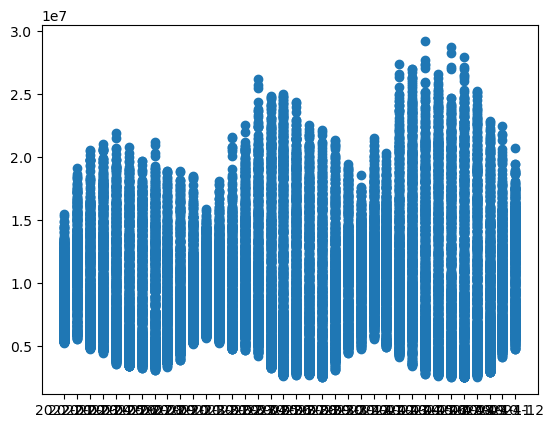

In [11]:
plt.scatter(df_filtered['month'], df_filtered['volume_0'])
plt.show()

In [12]:
import numpy as np

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered['volume_0'], df_filtered['validto'])
print("Correlation coefficient matrix:")
print(r)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

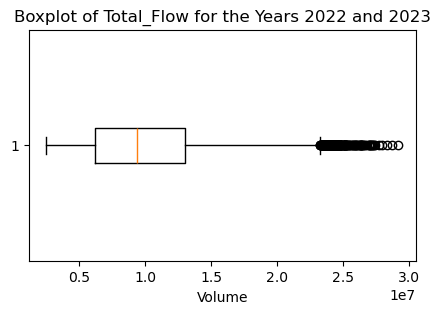

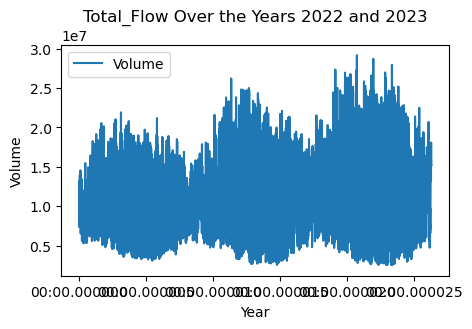

In [17]:
# Create a boxplot of the Total_Flow column for the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.boxplot(df_filtered['volume_0'].dropna(), vert=False)
plt.xlabel('Volume')
plt.title('Boxplot of Total_Flow for the Years 2022 and 2023')
plt.show()

# Plot the load over the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.plot(df_filtered.index, df_filtered['volume_0'], label='Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Total_Flow Over the Years 2022 and 2023')
plt.legend()
plt.show()


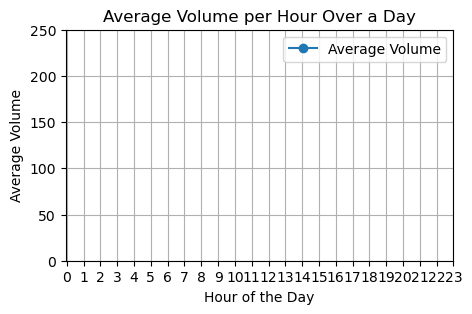

In [18]:
# Drop rows with missing values in 'Price' column
df_filtered_price = df_filtered[['volume_0']].dropna()

# Extract the hour from the index
df_filtered_price['Hour'] = df_filtered_price.index.hour

# Calculate the average price per hour
average_price_per_hour = df_filtered_price.groupby('Hour')['volume_0'].mean()

# Plot the average price per hour
plt.figure(figsize=(5,3))
plt.plot(average_price_per_hour.index, average_price_per_hour, marker='o', linestyle='-', label='Average Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Volume')
plt.title('Average Volume per Hour Over a Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.legend()
plt.ylim(0,250)
plt.show()

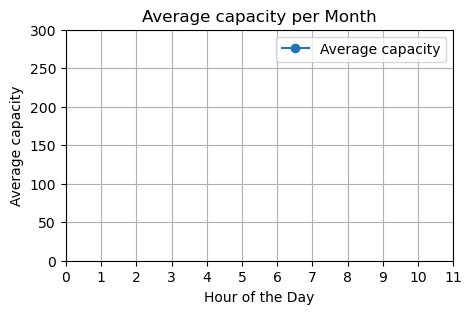

In [20]:
# Extract the month from the index
df_filtered_price['Month'] = df_filtered_price.index.month

# Calculate the average price per month
average_price_per_month = df_filtered_price.groupby('Month')['volume_0'].mean()

# Plot the average price per month
plt.figure(figsize=(5,3))
plt.plot(average_price_per_month.index, average_price_per_month, marker='o', linestyle='-', label='Average capacity')
plt.xlabel('Hour of the Day')
plt.ylabel('Average capacity')
plt.title('Average capacity per Month')
plt.xticks(range(12))  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.legend()
plt.ylim(0,300)
plt.show()